8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.

10. Train an SVM regressor on the California housing datase

### Question 8  

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [45]:
np.random.seed(42)

class_0 = np.random.randn(50, 2) + np.array([-3, -3])
class_1 = np.random.randn(50, 2) + np.array([3, 3])

X = np.vstack((class_0, class_1))
y = np.array([0]*50 + [1]*50)

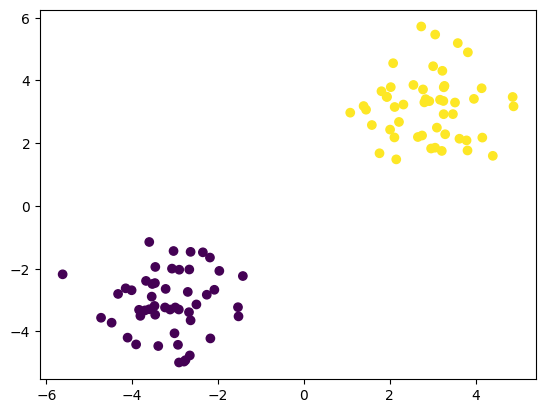

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [61]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 1, loss='hinge').fit(X,y)

##### Marginal lines and best fit lines

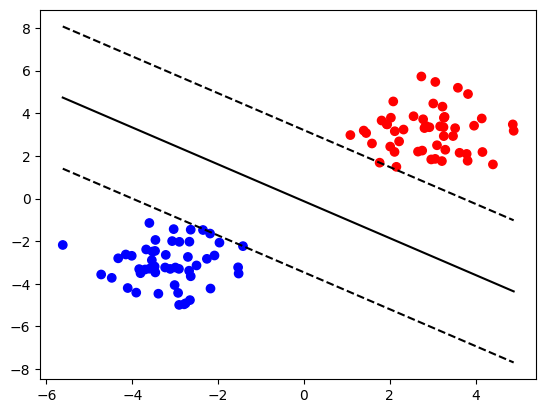

In [62]:
plt.scatter(X[:,0], X[:, 1],c=y, cmap="bwr")
weights = svc.coef_[0]      #w1 and w2
intercept = svc.intercept_
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
bestfit_line= -(weights[0]*x_vals + intercept) / weights[1]
margin_positive = -(weights[0]*x_vals + intercept - 1) / weights[1]
margin_negative = -(weights[0]*x_vals + intercept + 1) / weights[1]

# Plot lines
plt.plot(x_vals, bestfit_line, "k-")      # main line
plt.plot(x_vals, margin_positive, "k--")       # upper margin
plt.plot(x_vals, margin_negative, "k--")       # lower margin


In [49]:
np.random.seed(100)  # different seed for new data

X_test = np.random.randn(40, 2)
y_test = (X_test[:, 0] + X_test[:, 1] > 0).astype(int)

In [50]:
linear_pred = svc.predict(X_test)
linear_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

##### Evaluating the model

In [51]:
from sklearn.metrics import accuracy_score
print("The accuracy score for linear svc is: ", accuracy_score(y_test, linear_pred))

The accuracy score for linear svc is:  0.95


Applying SGD gradient decent and SVC

In [52]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge').fit(X,y)

In [53]:
sgd.predict(test_point)

array([0])

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X,y)

In [55]:
svc.predict(test_point)

array([0])

In [56]:
svc.coef_[0]

array([0.25028775, 0.30753868])

##### Question # 9

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?

In [63]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [65]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [66]:
X = mnist['data']
y=mnist['target']

In [78]:
def draw_image(index):
    some_image = X.iloc[index, :].to_numpy().reshape(28,28)
    plt.imshow(some_image, cmap='binary')
    plt.axis('off')
    print("The following image is classified as: ", y[index])

The following image is classified as:  2


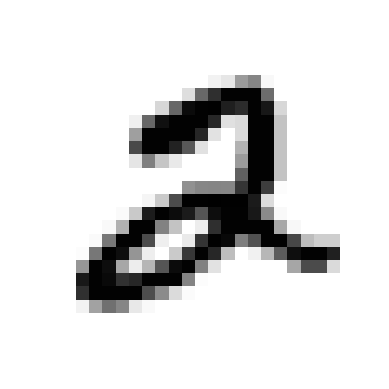

In [79]:
draw_image(5)

The following image is classified as:  0


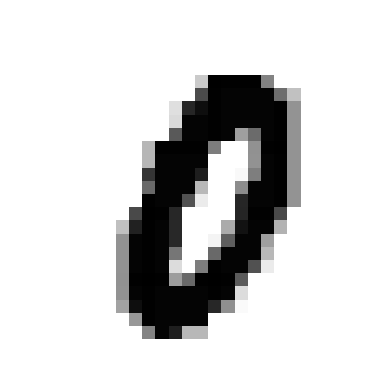

In [81]:
draw_image(34)

##### Adding more features for more accuracy

In [85]:
X_numpy = X.to_numpy()
X_numpy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [112]:
from scipy.ndimage import shift
X_aug =[]
y_aug =[]
for dir in ['left','right', 'up', 'down']:
    for i in range(len(X_numpy)):
        img = X.iloc[i].to_numpy().reshape(28,28) 
        label = y.iloc[i]
        if dir.lower() == 'left':
            shifted = shift(img,[0,-1],cval = 0)
        elif dir.lower() == 'right':
            shifted = shift(img,[0,1],cval = 0)
        elif dir.lower() == 'up':
            shifted = shift(img,[-1,0],cval = 0)
        elif dir.lower() == 'down':
            shifted = shift(img,[-1,0],cval = 0)
        X_aug.append(shifted.flatten())
        y_aug.append(label)

In [116]:
X = np.concat([X,X_aug],axis = 0)
y = np.concat([y,y_aug], axis = 0)

In [119]:
print("Original shape:", X.shape)
print("Augmented shape:", np.array(X_aug).shape)

Original shape: (350000, 784)
Augmented shape: (280000, 784)
